# CEG5304 Project 1

In this project, you are going to start an exciting journey to explore Deep Learning and Neural Networks by completing the following three tasks:

* Task 1. Understanding and conducting convolution.
* Task 2. Building and training a ResNet18 model.
* Task 3. Exploring and explaining the trained model.

Before doing the project, please read the instructions carefully (failure to do so will be penalized):

1. Implement your codes **within** "TODO" and "END OF YOUR CODE", do **NOT** modify any codes outside the answer area;
2. Make sure your codes **clean**, **easily readable** (add meaningful comments if needed), and **runnable**;
3. Write your answers in the given markdown cells, keep your answers clear and concise;
4. Do submit your project on [Canvas](https://canvas.nus.edu.sg/) before the deadline;
5. Make sure that the submitted notebooks have been run and the cell outputs are visible.
6. This is an individual project, do **NOT** share your solutions with others, we have zero tolerance for cheating.

## Task 1: Understanding and conducting convolution
Use numpy to conduct 2D standard and dilated convolution operation.

You may refer to *["A guide to convolution arithmetic for deeplearning"](https://arxiv.org/pdf/1603.07285.pdf)* for details of dilated convolution.

In this task, we follow the settings as in the paper:
* 2-D discrete convolutions,
* square inputs,
* square kernel size,
* same strides along both axes,
* same zero padding along both axes.

In [1]:
import numpy as np

In [2]:
def conv2d(inputs,kernels,padding=0, stride=1):
    assert inputs.shape[0] == kernels.shape[1], "The numbers of channels of input and kernel do not match."
    ##############################################################################
    # TODO:
    #                                                                            #
    ##############################################################################
    # your code

    c, h, w = inputs.shape
    output_c, kerel_c, kernel_h, kernel_w = kernels.shape
    output_h = (h + 2 * padding - kernel_h) // stride + 1
    output_w = (w + 2 * padding - kernel_w) // stride + 1

    padded_inputs = np.zeros((c, h + 2 * padding, w + 2 * padding))
    padded_inputs[:, padding: (h + padding), padding: (w + padding)] = inputs

    outputs = np.zeros((output_c, output_h, output_w))
    for k in range(output_c):
        kernel = kernels[k, :, :]
        for i in range(output_h):
            for j in range(output_w):
                window = padded_inputs[:, i*stride:i*stride+kernel_h, j*stride:j*stride+kernel_w]
                outputs[k, i, j] = np.sum(kernel * window)

    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################

    return outputs

In [3]:
def dilated_conv2d(inputs,kernels,dilation,padding=0,stride=1):
    assert inputs.shape[0] == kernels.shape[1], "The numbers of channels of input and kernel do not match."
    ##############################################################################
    # TODO:
    #                                                                            #
    ##############################################################################
    # your code

    outputs_c, kernel_c, kernel_h, kernel_w = kernels.shape
    new_kernels = np.zeros((outputs_c, kernel_c, (kernel_h-1)*dilation+1, (kernel_w-1)*dilation+1))
    for c in range(outputs_c):
        for kc in range(kernel_c):
            for kh in range(kernel_h):
                for kw in range(dilation):
                    new_kernels[c, kc, kh*dilation, kw*dilation] = kernels[c, kc, kh, kw]
    outputs = conv2d(inputs, new_kernels, padding, stride)

    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################

    return outputs

In [4]:
np.random.seed(2024)
inputs = np.random.randint(0,3,size=(2,5,5))
kernels = np.random.randint(0,3,size=(3,2,2,2))
print(f"Inputs:\n{inputs}\n")
print(f"Kernels:\n{kernels}")

Inputs:
[[[0 2 0 0 0]
  [2 1 1 0 2]
  [2 0 1 0 1]
  [2 2 2 0 2]
  [2 1 2 2 0]]

 [[2 1 2 2 1]
  [1 1 2 0 1]
  [2 2 2 0 2]
  [0 2 1 2 2]
  [0 0 1 2 1]]]

Kernels:
[[[[0 0]
   [1 2]]

  [[2 0]
   [2 0]]]


 [[[1 1]
   [2 2]]

  [[0 0]
   [0 1]]]


 [[[1 0]
   [1 1]]

  [[1 1]
   [0 0]]]]


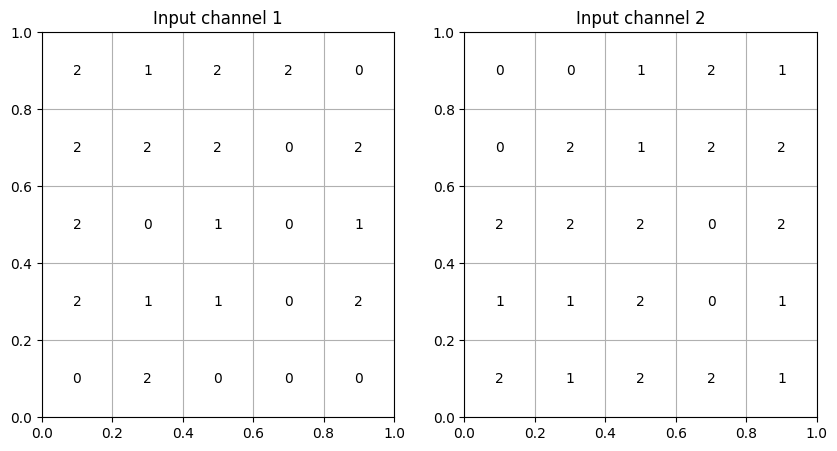

In [5]:
# visualize inputs
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 5))
for i in range(inputs.shape[0]):
    ax = fig.add_subplot(1, inputs.shape[0], i+1, xticks=[], yticks=[])
    ax.set_title('Input channel %s' % str(i+1))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(True)
    width = inputs[i].shape[0]
    height = inputs[i].shape[1]


    ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=width))
    ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=height))
    for x in range(width):
        for y in range(height):
            ax.annotate(str(inputs[i][x][y]), xy=(y/height+(0.5/height),x/width+(0.5/height)),
                        horizontalalignment='center',
                        verticalalignment='center')


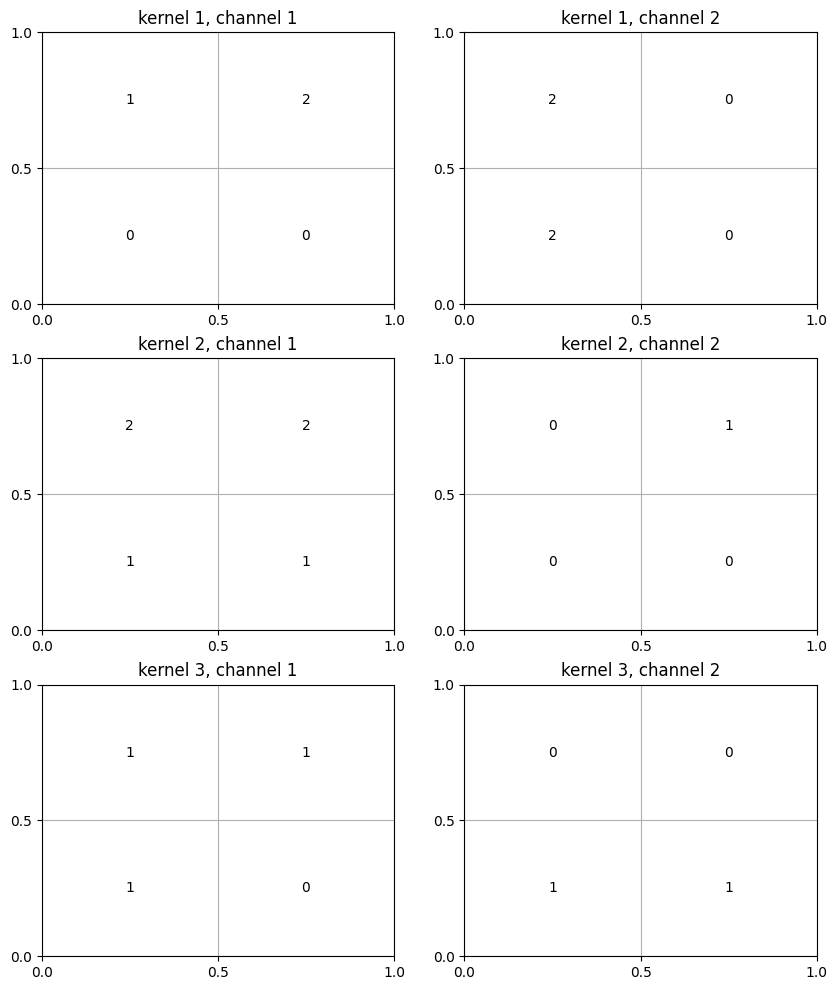

In [6]:
# visualize kernels
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 12))
for i in range(kernels.shape[0]):
    for j in range(kernels.shape[1]):
        ax = fig.add_subplot(kernels.shape[0], kernels.shape[1], i*kernels.shape[1] + j+1, xticks=[], yticks=[])
        ax.set_title(f'kernel {str(i+1)}, channel {str(j+1)}')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.grid(True)
        width = kernels[i][j].shape[0]
        height = kernels[i][j].shape[1]
        ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=width))
        ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=height))
        for x in range(width):
            for y in range(height):
                ax.annotate(str(kernels[i][j][x][y]), xy=(y/height+(0.5/height),x/width+(0.5/height)),
                            horizontalalignment='center',
                            verticalalignment='center')

In [7]:
conv2d(inputs,kernels,stride=1)

array([[[10.,  7.,  9.,  8.],
        [ 8.,  8.,  9.,  2.],
        [10., 14.,  8.,  8.],
        [ 4.,  9., 10., 10.]],

       [[ 9.,  8.,  2.,  5.],
        [ 9.,  6.,  3.,  6.],
        [12., 10.,  7.,  7.],
        [10., 11., 12.,  7.]],

       [[ 6.,  7.,  5.,  5.],
        [ 6.,  5.,  4.,  2.],
        [10.,  8.,  5.,  4.],
        [ 7.,  8.,  9.,  6.]]])

In [8]:
dilated_conv2d(inputs,kernels,dilation=2)

array([[[12.,  6., 11.],
        [ 8.,  8., 12.],
        [10.,  9.,  8.]],

       [[ 8.,  2.,  6.],
        [12.,  7., 13.],
        [12.,  8.,  7.]],

       [[ 7.,  5.,  5.],
        [ 9.,  4.,  8.],
        [10.,  5.,  7.]]])

## Task 2: Building and training a ResNet18 model

### Prepare packages and dataset

In [9]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim
import time

In [10]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_size = len(train_set)
print(train_size)
test_size = len(test_set)
print(test_size)

Files already downloaded and verified
Files already downloaded and verified
50000
10000


### Define the ResNet18 model

Residual Network (ResNet) is a deep learning model widely used for computer vision applications. It is a Convolutional Neural Network (CNN) architecture. ResNet provides an innovative solution to the vanishing gradient problem, known as “residual connections”.

ResNet includes multiple "residual blocks", each of which contains certain types of layers and residual connections as shown in the figure below.

Refer to the paper *["Deep Residual Learning for Image Recognition"](https://arxiv.org/pdf/1512.03385.pdf)* for information about ResNet architecture.

Figure out the architecture of ResNet18 and implement to define a ResNet18 model in the following code block.

Note that while doing residual connection, if the dimensions of the input and output of the residual block are not the same, we adjust channels and resolution of the input by means of a convolution before adding.

![](resnet-block.svg)




In [11]:
class ResidualBlock(nn.Module):
    def __init__(self, input_channels, num_channels,
                 strides=1):
        ##############################################################################
        #                             END OF YOUR CODE                               #
        ##############################################################################
        super().__init__()
        self.conv1 = nn.Conv2d(input_channels, num_channels,
                               kernel_size=3, padding=1, stride=strides)
        self.conv2 = nn.Conv2d(num_channels, num_channels,
                               kernel_size=3, padding=1)
        if strides!=1 or input_channels!=num_channels:
            self.conv3 = nn.Conv2d(input_channels, num_channels,
                                   kernel_size=1, stride=strides)
        else:
            self.conv3 = None
        self.bn1 = nn.BatchNorm2d(num_channels)
        self.bn2 = nn.BatchNorm2d(num_channels)
        ##############################################################################
        #                             END OF YOUR CODE                               #
        ##############################################################################


    def forward(self, X):
        ##############################################################################
        #                             END OF YOUR CODE                               #
        ##############################################################################
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        Y += X
        return F.relu(Y)
        ##############################################################################
        #                             END OF YOUR CODE                               #
        ##############################################################################

In [12]:
class ResNet18(nn.Module):
        ##############################################################################
        #                             END OF YOUR CODE                               #
        ##############################################################################
    def resnet_block(self, input_channels, num_channels, num_residuals,
                     first_block):
        blk = []
        for i in range(num_residuals):
            if i == 0 and not first_block:
                blk.append(ResidualBlock(input_channels, num_channels,
                                    strides=2))
            else:
                blk.append(ResidualBlock(num_channels, num_channels))
        return blk

    def __init__(self):
        super().__init__()
        block1 = nn.Sequential(nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
                   nn.BatchNorm2d(64), nn.ReLU(),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))
        block2 = nn.Sequential(*self.resnet_block(64, 64, 2, first_block=True))
        block3 = nn.Sequential(*self.resnet_block(64, 128, 2, first_block=False))
        block4 = nn.Sequential(*self.resnet_block(128, 256, 2, first_block=False))
        block5 = nn.Sequential(*self.resnet_block(256, 512, 2, first_block=False))
        self.feature = nn.Sequential(block1, block2, block3, block4, block5, nn.AdaptiveAvgPool2d((1,1)), nn.Flatten())

        self.fc = nn.Linear(512,10)

    def forward(self,X):
        X = self.fc(self.feature(X))
        return X
        ##############################################################################
        #                             END OF YOUR CODE                               #
        ##############################################################################

In [13]:
model = ResNet18()
model

ResNet18(
  (feature): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): ResidualBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): ResidualBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=T

### Train the model

In [14]:
# Hyperparameters
epochs = 10
batch_size = 256
learning_rate = 0.1

# Set up optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Define loss function
criterion = torch.nn.CrossEntropyLoss()

# Build data loaders
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=0)
data_loaders = {"train": train_loader, "test": test_loader}
dataset_sizes = {"train": train_size, "test": test_size}

Write a functions to evaluate the model on testing set and train the model for one epoch in the following code block.

In [15]:
def eval_on_test_set(model):
    model.eval()
    device = torch.cuda.current_device() if torch.cuda.is_available() else "cpu"
    model.to(device)
    running_accuracy = 0
    loss=0

    for data in test_loader:
        ##############################################################################
        # TODO: Implement the evaluation process on test set.                        #
        ##############################################################################
        inputs,labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        # Forward
        outputs = model(inputs)

        # Calculate loss
        loss += criterion(outputs,labels).item()*batch_size

        # Calculate accuracy
        running_accuracy += (outputs.argmax(dim=-1) == labels).float().sum()

        ##############################################################################
        #                             END OF YOUR CODE                               #
        ##############################################################################
    total_loss=loss/test_size
    total_accuracy = running_accuracy / test_size
    print('Evaluation  on test set: loss{:.3f} \t accuracy = {:.2f}%'.format(total_loss, total_accuracy * 100))
    model.train()
    return total_loss, total_accuracy

In [16]:
def train_for_one_epoch(model):
    model.train()
    # Set up device
    device = torch.cuda.current_device() if torch.cuda.is_available() else "cpu"
    print(f"Using device {device} to train the model.")
    model.to(device)

    # set the running quatities to zero at the beginning of the epoch
    running_loss = 0
    running_accuracy = 0

    for data in train_loader:
      ##############################################################################
      # TODO: Implement the training process.                                      #
      ##############################################################################
      inputs, labels = data
      inputs = inputs.to(device)
      labels = labels.to(device)

      # zero the parameter gradients
      optimizer.zero_grad()

      # forward + backward + optimize
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      # Compute batch loss
      running_loss += loss.item()*batch_size

      # Compute batch accuracy
      running_accuracy += (outputs.argmax(dim=-1) == labels).float().sum()

      ##############################################################################
      #                             END OF YOUR CODE                               #
      ##############################################################################

    # Compute stats for the full training set
    total_loss = running_loss / train_size
    total_accuracy = running_accuracy / train_size

    return total_loss, total_accuracy

For model training it is recommended to train your model on GPU, you may consider using [Colab](https://colab.google/) for free computing resources for faster training. Note that free computing resources accessible on [Colab](https://colab.google/) is limited for each day, so it is recommended to train the model after you make sure you codes are correct.

For your reference, training the model for 10 epochs on a MacBook with M2 chip may cost roughly 2 hrs.

In [17]:
# start training

metrics = {"train_loss":[], "train_acc":[], "test_loss":[], "test_acc":[]}
for epoch in range(epochs):
  start=time.time()
  train_loss_epoch, train_acc_epoch = train_for_one_epoch(model)
  elapsed = (time.time()-start) / 60
  print('Training epoch= {} \t cost_time= {:.2f} min \t loss= {:.3f} \t accuracy= {:.2f}%'.format(epoch, elapsed, train_loss_epoch, train_acc_epoch * 100))
  test_loss_epoch, test_acc_epoch = eval_on_test_set(model)
  metrics['train_loss'].append(train_loss_epoch)
  metrics['train_acc'].append(train_acc_epoch)
  metrics['test_loss'].append(test_loss_epoch)
  metrics['test_acc'].append(test_acc_epoch)

# save your trained model for the following question
torch.save(model.state_dict(), './model_resnet18.pt')

Using device 0 to train the model.
Training epoch= 0 	 cost_time= 0.56 min 	 loss= 1.627 	 accuracy= 42.82%
Evaluation  on test set: loss1.624 	 accuracy = 45.08%
Using device 0 to train the model.
Training epoch= 1 	 cost_time= 0.37 min 	 loss= 1.114 	 accuracy= 60.81%
Evaluation  on test set: loss1.302 	 accuracy = 55.52%
Using device 0 to train the model.
Training epoch= 2 	 cost_time= 0.37 min 	 loss= 0.893 	 accuracy= 68.72%
Evaluation  on test set: loss1.449 	 accuracy = 54.63%
Using device 0 to train the model.
Training epoch= 3 	 cost_time= 0.38 min 	 loss= 0.744 	 accuracy= 74.00%
Evaluation  on test set: loss1.676 	 accuracy = 51.88%
Using device 0 to train the model.
Training epoch= 4 	 cost_time= 0.39 min 	 loss= 0.630 	 accuracy= 77.91%
Evaluation  on test set: loss1.209 	 accuracy = 62.05%
Using device 0 to train the model.
Training epoch= 5 	 cost_time= 0.36 min 	 loss= 0.532 	 accuracy= 81.52%
Evaluation  on test set: loss1.778 	 accuracy = 51.73%
Using device 0 to trai

Visualize the training curves for loss and accuracy in the following code block. Your figure should include two subplots, one for loss curves on training and testing sets, and another for accuracy curves on training and testing sets.

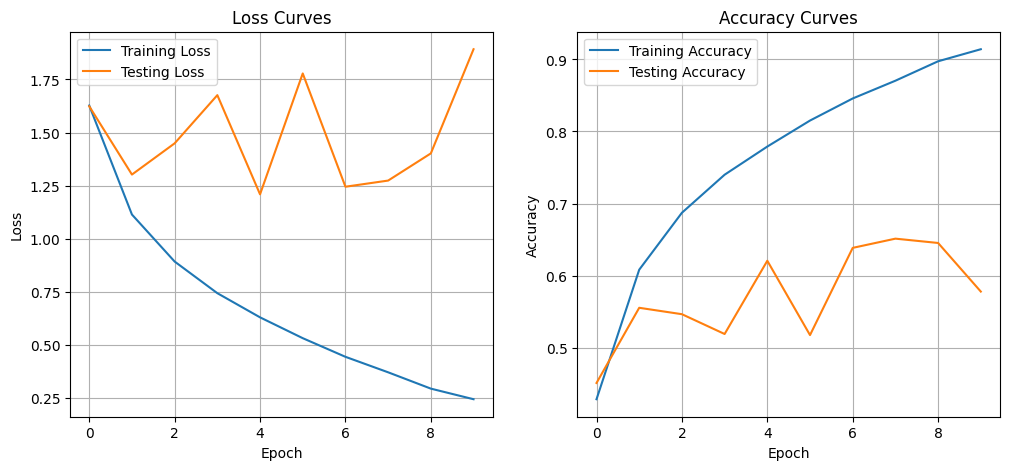

In [36]:
###############################################################################
# TODO: visualize the loss curves and accuracy curves on training and         #
#       testing sets respectively during training.                            #
##############################################################################

# your code

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 5))
x = range(epochs)

loss_curves = fig.add_subplot(1, 2, 1)
loss_curves.set_title("Loss Curves")
loss_curves.set_xlabel("Epoch")
loss_curves.set_ylabel("Loss")
loss_curves.plot(x, metrics['train_loss'], label='Training Loss')
loss_curves.plot(x, metrics['test_loss'], label='Testing Loss')
loss_curves.legend()
loss_curves.grid(True)

accuracy_curves = fig.add_subplot(1, 2, 2)
accuracy_curves.set_title("Accuracy Curves")
accuracy_curves.set_xlabel("Epoch")
accuracy_curves.set_ylabel("Accuracy")
train_acc = [x.cpu() for x in metrics['train_acc']]
test_acc = [x.cpu() for x in metrics['test_acc']]
accuracy_curves.plot(x, train_acc, label='Training Accuracy')
accuracy_curves.plot(x, test_acc, label='Testing Accuracy')
accuracy_curves.legend()
accuracy_curves.grid(True)

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

### Improve the ResNet18 trained above


Observe the loss and accuracy curves during training and testing respectively, what potential problem can be concluded if continue training the model for further epochs most probably? What kind of techniques can be applied to solve this problem?

---
**Write your observations and analysis in this Markdown cell:**


```
```


---

Please choose one technique you mentioned above to implement in the following code block, observe and report the loss and accuracy again.

In [19]:
##############################################################################
# TODO: Conduct experiments to refine your model (e.g., modify the backbone, #
# alter the learning strategy, and tuning the hyperparameters, etc.).        #
##############################################################################

# your code



##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

---
**Write your observations and analysis in this Markdown cell:**


```

```
---

## Task 3: Exploring and explaining the trained model.

### Load the trained ResNet18 model above.

In [20]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib.cm as cm
import torch.nn as nn
import os

# trained_model = ResNet18()
# assert os.path.exists('./model_resnet18.pt'), 'train the model first'
# # Load the trained model
# trained_model.load_state_dict(torch.load('./model_resnet18.pt', map_location=torch.device('cpu')))
trained_model = model
device = torch.cuda.current_device() if torch.cuda.is_available() else 'cpu'
trained_model.to(device)
trained_model.eval()

ResNet18(
  (feature): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): ResidualBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): ResidualBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=T

In [21]:
part = model.feature[:1]
print(part)
for batch in test_loader:
    imgs, lbls = batch
    logits = part(imgs.to(device))
    print(imgs.shape)
    print(lbls.shape)
    print(logits.shape)
    break

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
)
torch.Size([256, 3, 32, 32])
torch.Size([256])
torch.Size([256, 64, 8, 8])


### Visualize the learned features for the pre-trained ResNet18 of different layers of model.

t-SNE (t-distributed Stochastic Neighbor Embedding) is an unsupervised non-linear dimensionality reduction technique for data exploration and visualizing high-dimensional data. Here, you shall apply t-SNE to the features extracted from a bottom layer and a top layer of the trained ResNet18 model.

You should complete:
* 1) extract features for the bottom layer and top layer respectively, i.e., the intermediate outputs of these layers.
* 2) if the extracted features are in form of feature maps, reshape the feature map for each sample to make it a vector.
* 3) visualize the features for the bottom and top layers by t-SNE, observe and analyze the results.

The bottom layer is defined as the first max-pooling layer of the whole model; the top layer is defined as the penultimate layer of the whole model. (We refer to the input side as "bottom" and the output side as "top".)

(10000, 512)
(10000, 4096)


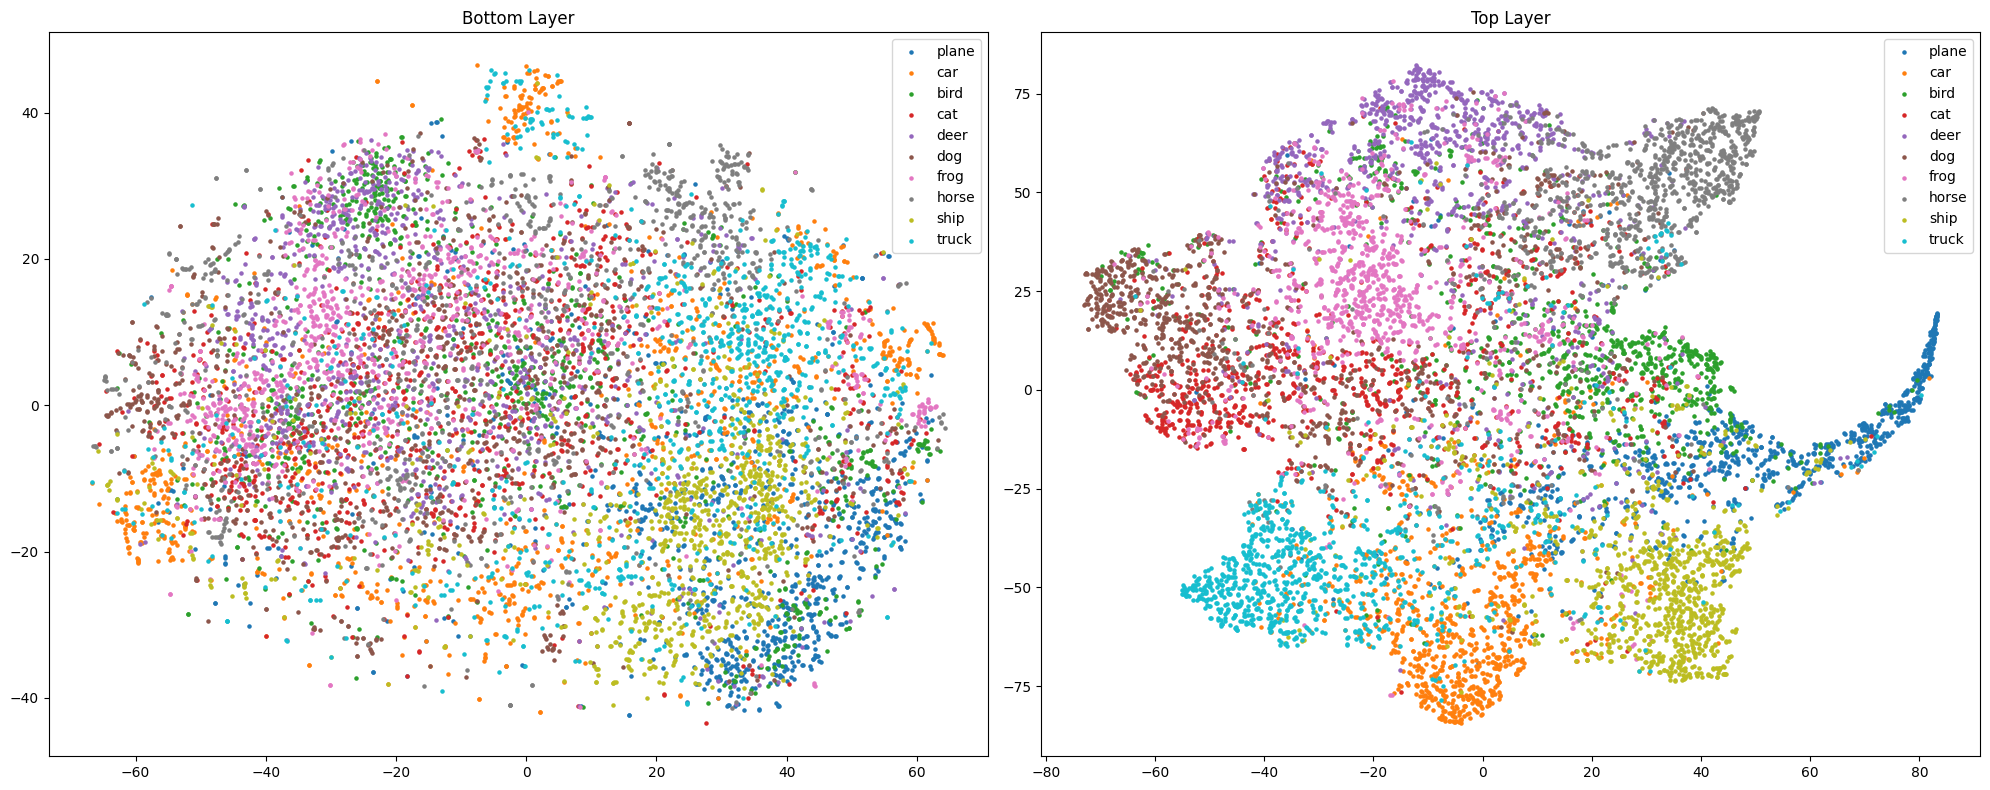

In [22]:
# Extract the representations for the specific layer of model
# You should find out the index of layer which is defined as "top" or 'mid' layer of your model.
##############################################################################
# Define the top and bottom intermediate feature extractor based on your     #
# ResNet18 model, i.e., the feature extractors are parts of the model.       #                                       #
##############################################################################
# your code
index_top = 7
index_bottom = 1

features_top = []
features_bottom = []
labels = []
for batch in test_loader:
    imgs, lbls = batch
    with torch.no_grad():
        logits_top = model.feature[:index_top](imgs.to(device))
        logits_top = logits_top.view(logits_top.size()[0], -1)
        logits_bottom = model.feature[:index_bottom](imgs.to(device))
        logits_bottom = logits_bottom.view(logits_bottom.size()[0], -1)
    labels.extend(lbls.cpu().numpy())
    logits_top = np.squeeze(logits_top.cpu().numpy())
    features_top.extend(logits_top)
    logits_bottom = np.squeeze(logits_bottom.cpu().numpy())
    features_bottom.extend(logits_bottom)

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

features_top = np.array(features_top)
print(features_top.shape)
features_bottom = np.array(features_bottom)
print(features_bottom.shape)
colors_per_class = cm.rainbow(np.linspace(0, 1, 11))

# Apply t-SNE to the features
features_top_tsne = TSNE(n_components=2, init='pca', random_state=42).fit_transform(features_top)
features_bottom_tsne = TSNE(n_components=2, init='pca', random_state=42).fit_transform(features_bottom)

# Plot the t-SNE visualization
plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
plt.title('Bottom Layer')
for label in np.unique(labels):
    plt.scatter(features_bottom_tsne[labels == label, 0], features_bottom_tsne[labels == label, 1], label=classes[label], s=5)
plt.legend()
plt.subplot(1,2,2)
plt.title('Top Layer')
for label in np.unique(labels):
    plt.scatter(features_top_tsne[labels == label, 0], features_top_tsne[labels == label, 1], label=classes[label], s=5)
plt.legend()
plt.gcf().tight_layout()

plt.show()

---
**Write your observations and analysis in this Markdown cell:**

```

```

---

### Compute saliency map.

A saliency map tells us the degree to which each pixel in the image affects the classification score for that image. To compute it, we compute the gradient of the unnormalized score corresponding to the correct class (which is a scalar) with respect to the pixels of the image.

Read and understand the paper below, figure out how to compute saliency maps and implement it in the `compute_saliency_maps` function.

[Karen Simonyan, Andrea Vedaldi, and Andrew Zisserman. "Deep Inside Convolutional Networks: Visualising Image Classification Models and Saliency Maps", ICLR Workshop 2014.](https://arxiv.org/pdf/1312.6034.pdf)

In [23]:
### helper function
def show_saliency_maps(X, y, saliency):
    # Compute saliency maps for images in X

    # Convert the saliency map from Torch Tensor to numpy array and show images
    # and saliency maps together.
    if saliency.dim() == 4:
      saliency = saliency.permute(0, 2, 3, 1).numpy()
    elif saliency.dim() == 3:
      saliency = saliency.numpy()
    N = X.shape[0]
    for i in range(N):
        plt.subplot(2, N, i + 1)
        img = np.transpose((X.detach()/2+0.5).numpy(),(0,2,3,1))
        plt.imshow(img[i])
        plt.axis('off')
        plt.title(classes[y.detach().numpy()[i]])
        plt.subplot(2, N, N + i + 1)
        plt.imshow(saliency[i], cmap=plt.cm.hot)
        plt.axis('off')
        plt.gcf().set_size_inches(12, 5)
    plt.show()


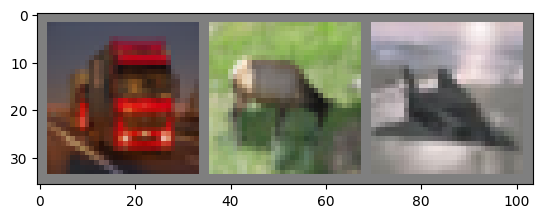

truck	deer 	plane


In [24]:
### example images for saliency map and SmoothGrad visualization

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(test_loader)
images,labels = next(dataiter)
X = images[-3:,:,:,:]
y = labels[-3:]

# show images
imshow(torchvision.utils.make_grid(X))
print('\t'.join(f'{classes[y[j]]:5s}' for j in range(3)))

In [25]:
def compute_saliency_maps(X, y, model):
    """
    Compute a class saliency map using the model for images X and labels y.

    Input:
    - X: Input images; Tensor of shape (N, 3, H, W)
    - y: Labels for X; Tensor of shape (N,)
    - model: A pretrained CNN that will be used to compute the saliency map.

    Returns:
    - saliency: A Tensor of shape (N, H, W) giving the saliency maps for the input
    images.
    """
    # Make sure the model is in "test" mode
    model.eval()

    ##############################################################################
    # TODO: Implement this function. Perform a forward and backward pass through #
    # the model to compute the gradient of the correct class score with respect  #
    # to each input image.                                                       #
    ##############################################################################
    # your code
    # Make input tensor require gradient
    X.requires_grad_()

    saliency = None
    #forward pass
    scores = model(X)

    #choose the score corresponding to the ground truth class for each image
    scores = (scores.gather(1, y.view(-1, 1)).squeeze())

    #backward pass
    scores.backward(torch.FloatTensor([1.0]*scores.shape[0]).to(X.device))

    #saliency
    saliency, _ = torch.max(X.grad.data.abs(), dim=1)

    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################
    return saliency

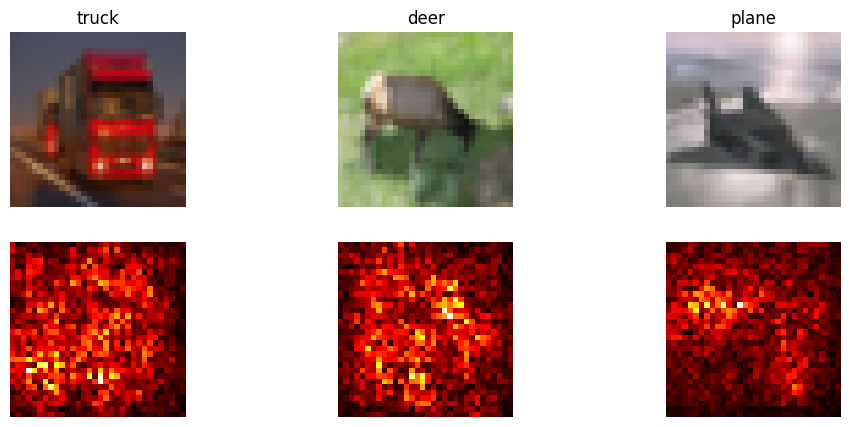

In [26]:
saliency = compute_saliency_maps(X.to(device), y.to(device), model)
show_saliency_maps(X, y, saliency.cpu())

In order to find an image that maximizes the correct score, we can perform gradient ascent on the input image, can we use the saliency map instead of the gradient we in each step to update the image. Is this assertion true? Why or why not?

---
**Write your answer and reason in this Markdown cell.**

---

```

```

### Obtain improved visualiztion results by SmoothGrad.

SmoothGrad is a method that can help visually sharpen gradient-based saliency maps thus improve the visulization quality. *["SmoothGrad: removing noise by adding noise", ICML2017.](https://arxiv.org/pdf/1706.03825.pdf)*


Read and understand the paper, implement SmoothGrad and apply **at least ONE** visualization technique mentioned in the paper in the following code block to get better results.

You may also refer to this [blog](https://medium.com/@ML-STATS/reducing-noise-and-improving-interpretability-in-cnns-a-technical-review-of-the-smoothgrad-method-da648ee830c6) for concise illustration for SmoothGrad.


In [27]:
from torch.autograd import Variable
def compute_smoothgrad(X, y, model, num_samples=50, stdev_spread=0.15):
    """
    Compute smoothed gradients for images in X given model

    Inputs:
    - X: Input images; Tensor of shape (N, 3, H, W)
    - y: Labels for X; Tensor of shape (N,)
    - model: A pretrained CNN that will be used to compute gradients; see
      the torchvision library
    - num_samples: An integer; the number of gradient samples to compute for each
      input in X.
    - stdev_spread: A float; the standard deviation of the Gaussians used to
      smooth the gradients.

    Returns:
    - smoothgrad: saliency: A Tensor of shape (N, 3, H, W) giving the smoothed saliency maps for the input
    images.
    """

    # Make sure the model is in "test" mode
    model.eval()

    ##############################################################################
    # TODO: Implement this function. Perform a forward and backward pass through #
    # the model to compute the gradient of the correct class score with respect  #
    # to each input image.                                                       #
    ##############################################################################
    # your code
    # Make input tensor require gradient
    X.requires_grad_()

    for i in range(num_samples):
      noise = Variable(X.data.new(X.size()).normal_(0, stdev_spread**2))
      X_noise = X + noise
      X_noise.requires_grad_()
      scores = model(X_noise)
      scores = (scores.gather(1, y.view(-1, 1)).squeeze())
      scores.backward(torch.FloatTensor([1.0]*scores.shape[0]).to(X.device))

      # visulization technique 1: taking absolute value
      if i == 0:
        smoothgrad = X.grad.data.abs()
      else:
        smoothgrad += X.grad.data.abs()

      # [optional] visualization technique 2: capping outlying values
      # [optional]visualization technique 3: multiply maps with the input images

    smoothgrad /= num_samples

    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################

    smoothgrad = (smoothgrad - smoothgrad.min()) / (smoothgrad.max() - smoothgrad.min())
    return smoothgrad



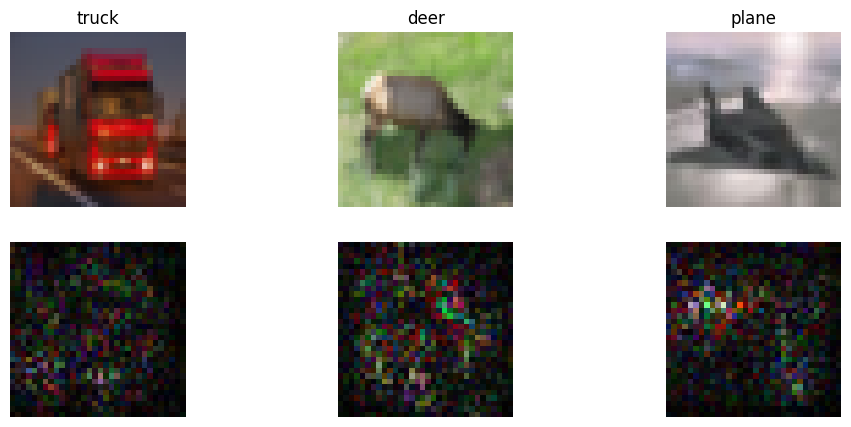

In [28]:
smoothgrad = compute_smoothgrad(X.to(device), y.to(device), model)
show_saliency_maps(X, y, smoothgrad.cpu())

Compare the results of saliency map and SmoothGrad, what is your discovery? Try to understand the papers to give a reason for the phenomenon.

---

**Write your observations and analysis in this Markdown cell:**

---

```

```

### Design and conduct experiment  to explore and explain how CNN works.

Design and conduct one experiment beyond the example images above by utilizing ```compute_smoothgrad```, e.g., compare the SmoothGrad maps of different classes given the same model, compare the SmoothGrad maps of the same class for different models, etc. Please quanlitatively show some evidence (e.g., plotting some examplar images clearly and elegantly) with necessary code snippets, write down your observations and briefly explain.

In [29]:
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################


##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

---

**Write your observations and analysis in this Markdown cell:**

---

```

```

### Fooling image
We can also use image gradients to generate "fooling images", that is, given an image and a target class, we can perform gradient ascent over the image to maximize the target class, stopping when the network classifies the image as the target class. Implement the following function to generate fooling images.

In [30]:
def make_fooling_image(X, target_y, model):
    """
    Generate a fooling image that is close to X, but that the model classifies
    as target_y.

    Inputs:
    - X: Input image; Tensor of shape (1, 3, H, W)
    - target_y: An integer in the range [0, 10)
    - model: A pretrained CNN

    Returns:
    - X_fooling: An image that is close to X, but that is classifed as target_y
    by the model.
    """
    # Initialize our fooling image to the input image, and make it require gradient
    X_fooling = X.clone()
    X_fooling = X_fooling.requires_grad_()

    learning_rate = 1
    ##############################################################################
    # TODO: Generate a fooling image X_fooling that the model will classify as   #
    # the class target_y. You should perform gradient ascent on the score of the #
    # target class, stopping when the model is fooled.                           #
    # When computing an update step, first normalize the gradient:               #
    #   dX = learning_rate * g / ||g||_2                                         #
    #                                                                            #
    # You should write a training loop.                                          #
    #                                                                            #
    # HINT: For most examples, you should be able to generate a fooling image    #
    # in fewer than 100 iterations of gradient ascent.                           #
    # You can print your progress over iterations to check your algorithm.       #
    ##############################################################################
    while True:
        scores = model(X_fooling)
        _, idx = torch.max(scores, 1)
        if (idx != target_y):
            scores[:,target_y].backward()
            dX = learning_rate*X_fooling.grad.data/torch.norm(X_fooling.grad.data)
            X_fooling.data += dX.data
            X_fooling.grad.data.zero_()
        else:
            break
    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################
    return X_fooling

In [31]:
target_y = 6 # label 'frog'
image_to_be_fooled = images[-1:,:,:,:] # an image of plane
y = labels[-1:] # label 'plane'

X_fooling = make_fooling_image(image_to_be_fooled.to(device), target_y, model.to(device))

scores = model(X_fooling)
assert target_y == scores.data.max(1)[1][0].item(), 'The model is not fooled!'

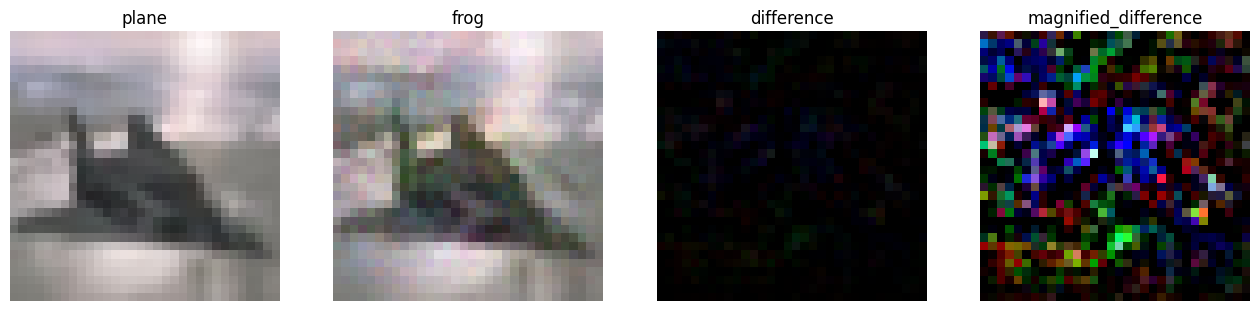

In [32]:
org_img = (torch.squeeze(image_to_be_fooled, dim=0).detach().cpu().numpy()) / 2 + 0.5
fooling_img = (torch.squeeze(X_fooling, dim = 0).detach().cpu().numpy()) / 2 + 0.5

fooling_img.astype(np.uint8)

fig = plt.figure(figsize=(16, 5))
plt.subplot(1, 4, 1)
plt.imshow(org_img.transpose((1, 2, 0)))
plt.title(classes[y])
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(fooling_img.transpose((1, 2, 0)))
plt.title(classes[target_y])
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow((org_img - fooling_img).transpose((1, 2, 0)))
plt.title('difference')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(10*(org_img - fooling_img).transpose((1, 2, 0)))
plt.title('magnified_difference')
plt.axis('off')

fig.show()